<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/11week/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/11주차/data/creditcard.csv')

In [27]:
LABELS = ["Normal", "Fraud"]

In [28]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape
normal.shape

(284315, 31)

In [29]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [30]:
RANDOM_SEED = 42

In [31]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(227451, 29)

In [32]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [33]:
history = autoencoder.fit(X_train, X_train, epochs=70, batch_size=256, shuffle=True, validation_split = 0.1)

Epoch 1/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.1301 - val_loss: 0.9162
Epoch 2/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9206 - val_loss: 0.8807
Epoch 3/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9080 - val_loss: 0.8722
Epoch 4/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8790 - val_loss: 0.8677
Epoch 5/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8777 - val_loss: 0.8621
Epoch 6/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8569 - val_loss: 0.8574
Epoch 7/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8786 - val_loss: 0.8538
Epoch 8/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8722 - val_loss: 0.8508
Epoch 9/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8585 - val_loss: 0.8484
Epoch 10/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8695 - val_loss: 0.8460
Epoch 11/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8553 - val_loss: 0.8438
Epoch 12/70
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step

In [34]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.868612,0.001720
std,3.708281,0.041443
min,0.049482,0.000000
25%,0.266452,0.000000
50%,0.455519,0.000000
75%,0.723469,0.000000
max,257.143285,1.000000


In [35]:
error_df.head()

,reconstruction_error,true_class
43428,81.050528,1
49906,0.835269,0
29474,0.392994,0
276481,0.428441,0
278846,0.195460,0


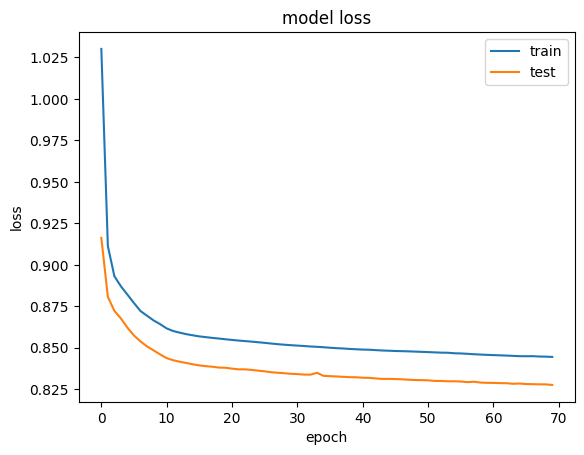

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

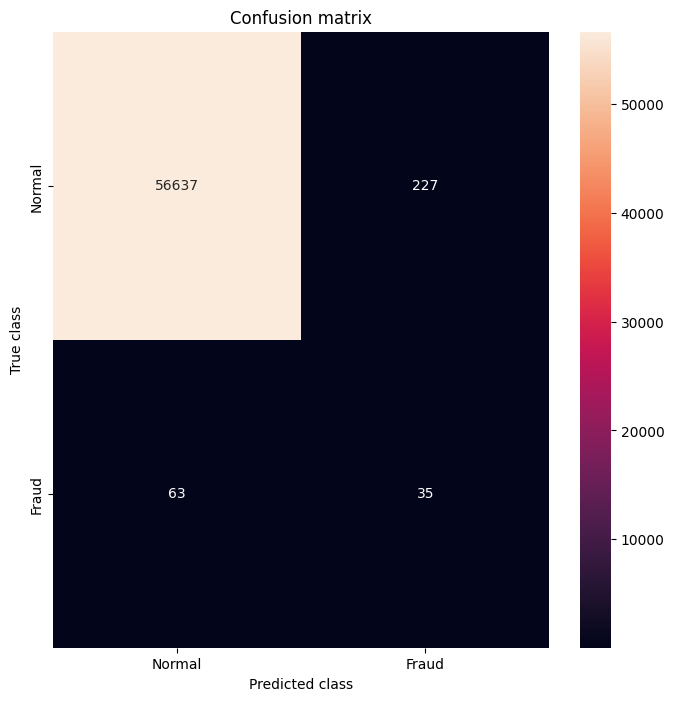

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.13      0.36      0.19        98

    accuracy                           0.99     56962
   macro avg       0.57      0.68      0.60     56962
weighted avg       1.00      0.99      1.00     56962



In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))